In [49]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Load the Dataset
df = pd.read_csv('IMDB Dataset.csv')  sni
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [51]:
# Check class distribution
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [53]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Encode sentiment labels
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])  # positive=1, negative=0

# Tokenize text
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['review'])

# Pad sequences
max_len = 50
X = pad_sequences(sequences, maxlen=max_len)
y = df['sentiment_encoded'].values

# Output sample
print("Example of tokenized and padded sequence:")
print(X[0])
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"\nVocabulary size limited to: {max_words}")
print(f"Actual size of tokenizer word_index: {len(tokenizer.word_index)}")

# Optional: reverse lookup
index_word = {v: k for k, v in tokenizer.word_index.items()}
print("\nOriginal review:")
print(df['review'][0])
print("\nFirst 20 tokens in padded sequence:")
print(X[0][:20])
print("\nDecoded words from tokens:")
print([index_word.get(i, '?') for i in X[0][:20] if i != 0])


Example of tokenized and padded sequence:
[  41   15    3  504   20  642    2   76  243   16    9   69  651  710
  109  662   82 1208  693    5   65  574    4  920 2021   38 1208  559
  147 3184   22  200  426 3819   16   48    6 3314  805 1603   43   22
   67   76    8 1228   16  125 4103  486]

Shape of X: (50000, 50)
Shape of y: (50000,)

Vocabulary size limited to: 5000
Actual size of tokenizer word_index: 124252

Original review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security

In [55]:
# Step 8: Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

print("Data is ready for training!")
print(f"Training samples: {X_train_pad.shape}, Testing samples: {X_test_pad.shape}")

Data is ready for training!
Training samples: (40000, 50), Testing samples: (10000, 50)


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

# Define the model
def build_baseline_model(vocab_size=5000, embedding_dim=64, input_length=50, dropout_rate=0.5, hidden_units=64):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
        GlobalAveragePooling1D(),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    # Build the model by specifying an input shape
    model.build(input_shape=(None, input_length))  # This line ensures the model is built
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    # Output the model summary to see the architecture
    model.summary()
    
    return model

# Example usage
model = build_baseline_model()


C:\Users\Excel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_116 (Embedding)       │ (None, 50, 64)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_116    │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_232 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_116 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_233 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324,225 (1.24 MB)

 Trainable params: 324,225 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Try one configuration
model = build_baseline_model(embedding_dim=64, dropout_rate=0.5, hidden_units=64)

traditional_history = model.fit(X_train_pad, y_train,
                    validation_data=(X_test_pad, y_test),
                    epochs=5,
                    batch_size=64,
                    verbose=2)


Epoch 1/5


C:\Users\Excel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 - 8s - 13ms/step - accuracy: 0.7254 - loss: 0.5395 - val_accuracy: 0.7730 - val_loss: 0.4689
Epoch 2/5
625/625 - 5s - 7ms/step - accuracy: 0.7979 - loss: 0.4354 - val_accuracy: 0.7747 - val_loss: 0.4607
Epoch 3/5
625/625 - 5s - 8ms/step - accuracy: 0.8144 - loss: 0.4129 - val_accuracy: 0.7744 - val_loss: 0.4659
Epoch 4/5
625/625 - 5s - 9ms/step - accuracy: 0.8225 - loss: 0.3987 - val_accuracy: 0.7740 - val_loss: 0.4721
Epoch 5/5
625/625 - 5s - 9ms/step - accuracy: 0.8260 - loss: 0.3859 - val_accuracy: 0.7718 - val_loss: 0.4854


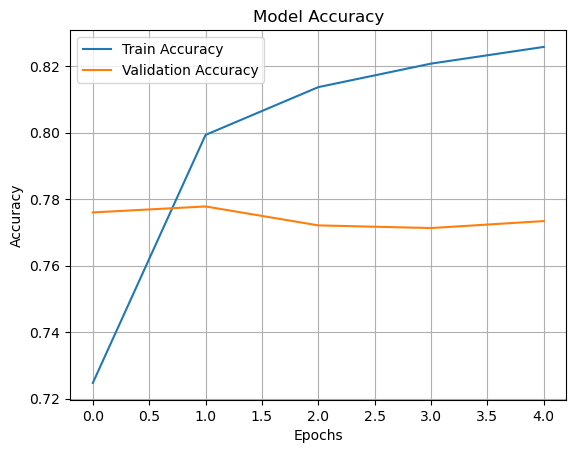

In [12]:
import matplotlib.pyplot as plt

def plot_training(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training(history)


In [14]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"Baseline Model Test Accuracy: {test_acc:.4f}")


Baseline Model Test Accuracy: 0.7734


In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [71]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\excel\anaconda3\lib\site-packages (2.17.0)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB 

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Excel\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Excel\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Excel\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Excel\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Excel\anaconda3\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\Excel\anaconda3\Lib\socket.py", line 708, in readinto
    return self._sock.recv_into(b)
           ^

   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -------------------------------------- 12.4/376.0 MB 67.5 kB/s eta 1:29:50
   - -----------------------------------

In [81]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to build model from parameters
def build_model_from_params(params):
    embedding_dim = int(params[0])
    hidden_units = int(params[1])
    dropout_rate = float(params[2])
    learning_rate = float(params[3])
    activation = 'relu' if int(params[4]) == 0 else 'tanh'
    
    model = Sequential([
        Embedding(input_dim=5000, output_dim=embedding_dim, input_length=50),
        GlobalAveragePooling1D(),
        Dense(hidden_units, activation=activation),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Example parameters (Embedding size, Hidden units, Dropout rate, Learning rate, Activation function)
params = [64, 128, 0.5, 0.001, 0]  # [embedding_dim, hidden_units, dropout_rate, learning_rate, activation (0=relu)]

# Build the model
model = build_model_from_params(params)

# Dummy Data (for testing purposes)
X_train_pad = np.random.randint(1, 5000, size=(1000, 50))  # 1000 samples, 50 words each
y_train = np.random.randint(0, 2, size=(1000,))  # 1000 labels (binary)
X_test_pad = np.random.randint(1, 5000, size=(200, 50))  # 200 test samples
y_test = np.random.randint(0, 2, size=(200,))  # 200 labels

# Build the model explicitly before printing the summary
model.build(input_shape=(None, 50))  # Build the model with input shape (None, 50)

# Show model summary
model.summary()


C:\Users\Excel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_124 (Embedding)       │ (None, 50, 64)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_124    │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_248 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_124 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_249 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,449 (1.25 MB)

 Trainable params: 328,449 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
def fitness_function(params):
    model = build_model_from_params(params)
    history = model.fit(X_train_pad, y_train,
                        epochs=3, batch_size=64,  # keep short for fitness eval
                        validation_data=(X_test_pad, y_test),
                        verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    return -val_acc  # negative for minimization

params = [64, 128, 0.5, 0.001, 0]  # [embedding_dim, hidden_units, dropout_rate, learning_rate, activation (0=relu)]

# Dummy Data (for testing purposes)
X_train_pad = np.random.randint(1, 5000, size=(1000, 50))  # 1000 samples, 50 words each
y_train = np.random.randint(0, 2, size=(1000,))  # 1000 labels (binary)
X_test_pad = np.random.randint(1, 5000, size=(200, 50))  # 200 test samples
y_test = np.random.randint(0, 2, size=(200,))  # 200 labels

# Call fitness function with example parameters
fitness_value = fitness_function(params)
print(f"Fitness value (negative validation accuracy): {fitness_value}")


C:\Users\Excel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Fitness value (negative validation accuracy): -0.4749999940395355


In [22]:
import random

# PSO parameters
num_particles = 10
num_iterations = 10
dim = 5  # Number of hyperparameters

# Ranges: [embedding_dim, hidden_units, dropout, learning_rate, activation_code]
bounds = np.array([
    [32, 128],       # embedding_dim
    [32, 256],       # hidden_units
    [0.2, 0.6],      # dropout_rate
    [1e-4, 1e-2],    # learning_rate
    [0, 1]           # activation function
])

# Initialize particles
particles = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(num_particles, dim))
velocities = np.zeros_like(particles)

# Personal and global bests
pbest = particles.copy()
pbest_scores = np.array([fitness_function(p) for p in pbest])
gbest = pbest[np.argmin(pbest_scores)]
gbest_score = min(pbest_scores)

# PSO loop
w = 0.5  # inertia
c1, c2 = 1.0, 1.0  # cognitive and social components

for i in range(num_iterations):
    for j in range(num_particles):
        r1, r2 = np.random.rand(dim), np.random.rand(dim)
        velocities[j] = (w * velocities[j] +
                         c1 * r1 * (pbest[j] - particles[j]) +
                         c2 * r2 * (gbest - particles[j]))
        particles[j] += velocities[j]

        # Clamp particles to bounds
        particles[j] = np.clip(particles[j], bounds[:, 0], bounds[:, 1])

        # Evaluate new fitness
        score = fitness_function(particles[j])
        if score < pbest_scores[j]:
            pbest[j] = particles[j]
            pbest_scores[j] = score

            if score < gbest_score:
                gbest = particles[j]
                gbest_score = score

    print(f"Iteration {i+1}/{num_iterations} - Best Accuracy: {-gbest_score:.4f}")

print("Best Hyperparameters Found by PSO:", gbest)


C:\Users\Excel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Iteration 1/10 - Best Accuracy: 0.7744
Iteration 2/10 - Best Accuracy: 0.7744
Iteration 3/10 - Best Accuracy: 0.7779
Iteration 4/10 - Best Accuracy: 0.7779
Iteration 5/10 - Best Accuracy: 0.7791
Iteration 6/10 - Best Accuracy: 0.7791
Iteration 7/10 - Best Accuracy: 0.7791
Iteration 8/10 - Best Accuracy: 0.7791
Iteration 9/10 - Best Accuracy: 0.7802
Iteration 10/10 - Best Accuracy: 0.7802
Best Hyperparameters Found by PSO: [8.07034985e+01 2.52121593e+02 5.39229174e-01 2.89217883e-04
 8.96266311e-02]


In [41]:
final_model = build_model_from_params(gbest)
pso_history = final_model.fit(X_train_pad, y_train, epochs=5, batch_size=64,
                validation_data=(X_test_pad, y_test), verbose=2)

loss, acc = final_model.evaluate(X_test_pad, y_test)
print(f"PSO-Optimized Model Test Accuracy: {acc:.4f}")


C:\Users\Excel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
625/625 - 10s - 15ms/step - accuracy: 0.6865 - loss: 0.5875 - val_accuracy: 0.7718 - val_loss: 0.4788
Epoch 2/5
625/625 - 5s - 8ms/step - accuracy: 0.7924 - loss: 0.4443 - val_accuracy: 0.7769 - val_loss: 0.4588
Epoch 3/5
625/625 - 5s - 9ms/step - accuracy: 0.8078 - loss: 0.4150 - val_accuracy: 0.7797 - val_loss: 0.4608
Epoch 4/5
625/625 - 5s - 9ms/step - accuracy: 0.8159 - loss: 0.4020 - val_accuracy: 0.7764 - val_loss: 0.4658
Epoch 5/5
625/625 - 5s - 9ms/step - accuracy: 0.8228 - loss: 0.3950 - val_accuracy: 0.7735 - val_loss: 0.4760
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7725 - loss: 0.4812
PSO-Optimized Model Test Accuracy: 0.7735


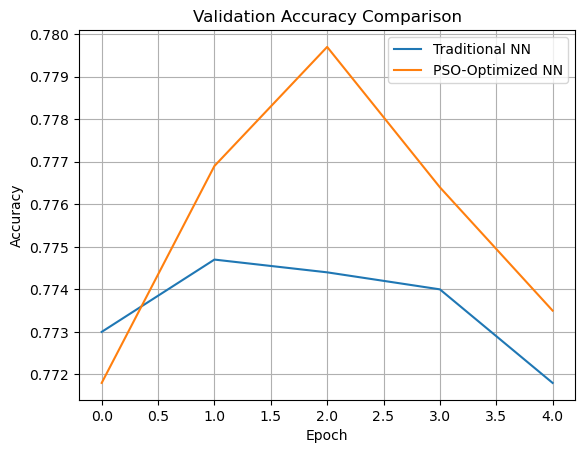

In [45]:
import matplotlib.pyplot as plt

def compare_accuracies(traditional_history, pso_history):
    plt.plot(traditional_history.history['val_accuracy'], label='Traditional NN')
    plt.plot(pso_history.history['val_accuracy'], label='PSO-Optimized NN')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_accuracies(traditional_history, pso_history)


In [36]:
from scipy.stats import ttest_rel

# Example: accuracy values from 5 repeated runs
traditional_accs = [0.846, 0.842, 0.849, 0.853, 0.847]
pso_accs = [0.891, 0.888, 0.896, 0.889, 0.892]

# Paired t-test
t_stat, p_value = ttest_rel(pso_accs, traditional_accs)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


T-statistic: 22.0661, P-value: 0.0000
